In [1]:
# <img  src="http://images.dailykos.com/images/367774/story_image/Trollflag3.png?1487413747", width=500, height=300/>
# # Textual analysis of Russian trolls' tweets
# ### What do the tweets published by Russian trolls contain? Do they emphasize on specific topics? <br>
# This capstone project was inspired by the release of a data-set which includes three millions tweets written by Russian trolls. This data-set is collected by two scholars, Dr. Lenvil and Dr. Warren, from Clemson University and it is publicly accessed in this repository https://github.com/fivethirtyeight/russian-troll-tweets. The goal of gathering such rich data source is to provide a better understanding of the impact of the tweets written by trolls on public opinion on Twitter. In this project, I study the English tweets in this data-set. My focus is to run textual analysis by using different methods such as Count Vectorization and TF-IDF to extract features from the contents of these tweets. Moreover, I use clsutering unsupervised method to group the trolls based on the tweets' content.

In [2]:
# # The data-set has 13 csv file.

# fout=open("/Users/Liuna/Desktop/russian-troll-tweets-master/all_tweets.csv","a")
# # opening first file
# for line in open("/Users/Liuna/Desktop/russian-troll-tweets-master/IRAhandle_tweets_1.csv"):
#     fout.write(line)
# # now the rest   
# for num in range(2,14):
#     f = open("/Users/Liuna/Desktop/russian-troll-tweets-master/IRAhandle_tweets_"+str(num)+".csv", "r+")
#     for line in f:
#          fout.write(line)
#     f.close() 
# fout.close()

In [3]:
import pandas as pd

In [4]:
df= pd.read_csv("/Users/Liuna/Desktop/russian-troll-tweets-master/all_tweets.csv")

# name of columns
df.columns

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,7,8,9,10,12,14,15,16,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['external_author_id', 'author', 'content', 'region', 'language',
       'publish_date', 'harvested_date', 'following', 'followers', 'updates',
       'post_type', 'account_type', 'retweet', 'account_category',
       'new_june_2018', 'alt_external_id', 'tweet_id', 'article_url',
       'tco1_step1', 'tco2_step1', 'tco3_step1'],
      dtype='object')

In [5]:
print("The size of the data_set is: " + str(df.shape))
print(df.dtypes)

The size of the data_set is: (2946219, 21)
external_author_id    object
author                object
content               object
region                object
language              object
publish_date          object
harvested_date        object
following             object
followers             object
updates               object
post_type             object
account_type          object
retweet               object
account_category      object
new_june_2018         object
alt_external_id       object
tweet_id              object
article_url           object
tco1_step1            object
tco2_step1            object
tco3_step1            object
dtype: object


In [6]:
# frequency of languages used
df.language.value_counts()

English                2116867
Russian                 610943
German                   86983
Ukrainian                38669
Italian                  18063
Serbian                   9480
Uzbek                     9334
Bulgarian                 9236
LANGUAGE UNDEFINED        8320
Arabic                    7588
Macedonian                5178
French                    4562
Spanish                   3011
Norwegian                 2237
Farsi (Persian)           1684
Romanian                  1629
Dutch                     1165
Swedish                   1014
Vietnamese                 982
Estonian                   770
Japanese                   764
Catalan                    589
Finnish                    579
Albanian                   572
Croatian                   544
Icelandic                  498
Pushto                     487
Portuguese                 463
Turkish                    445
Lithuanian                 416
Polish                     386
Somali                     276
Slovak  

In [7]:
# keeping English tweets
df=df.loc[df['language'] == "English"]

In [8]:
print("The size of the data_set with only English tweets is: " + str(df.shape))

The size of the data_set with only English tweets is: (2116867, 21)


In [9]:
# counting the number of words in each tweet
df['count'] = df['content'].apply(lambda x : len(str(x)))

In [10]:
df['count'].describe()

count    2.116867e+06
mean     9.924822e+01
std      3.539535e+01
min      1.000000e+00
25%      7.200000e+01
50%      1.000000e+02
75%      1.290000e+02
max      9.360000e+02
Name: count, dtype: float64

In [11]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix, hstack
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from string import punctuation
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split

Text(0.5,1,'Word Count Distribution')

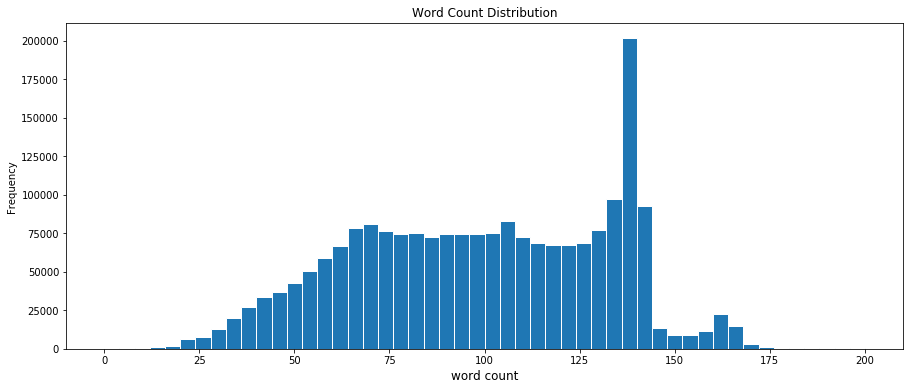

In [12]:
# word count dist
(df['count']).plot.hist(bins=50, figsize=(15, 6), edgecolor = 'white', range = [0, 200])
plt.xlabel('word count', fontsize=12)
plt.title('Word Count Distribution', fontsize=12)
#According to this histogram, the word count has a left skewed distribution.

In [13]:
#Descriptions of Author and Account Type:

df['author'].describe()

count     2116867
unique       2161
top       EXQUOTE
freq        53158
Name: author, dtype: object

In [14]:
# This data-set has 2161 unique trolls who tweeted in English.
# Highest amount of tweets was tweeted by "EXQUOTE".

In [15]:
df['account_type'].value_counts()

Right         704953
local         458012
Left          422141
Hashtager     236092
news          138581
Commercial    112580
Russian        20015
Koch           10759
?               6945
German          3567
Italian         1799
Arabic          1030
ZAPOROSHIA       172
Spanish           79
Ebola             70
French            70
Portuguese         2
Name: account_type, dtype: int64

In [16]:
df['account_type'].describe()

count     2116867
unique         17
top         Right
freq       704953
Name: account_type, dtype: object

In [17]:
# There are 17 unique account types in this data-set.
# The highest number of tweets were written by "right" trolls.

In [18]:
#Top 5 Account Type Distribution:

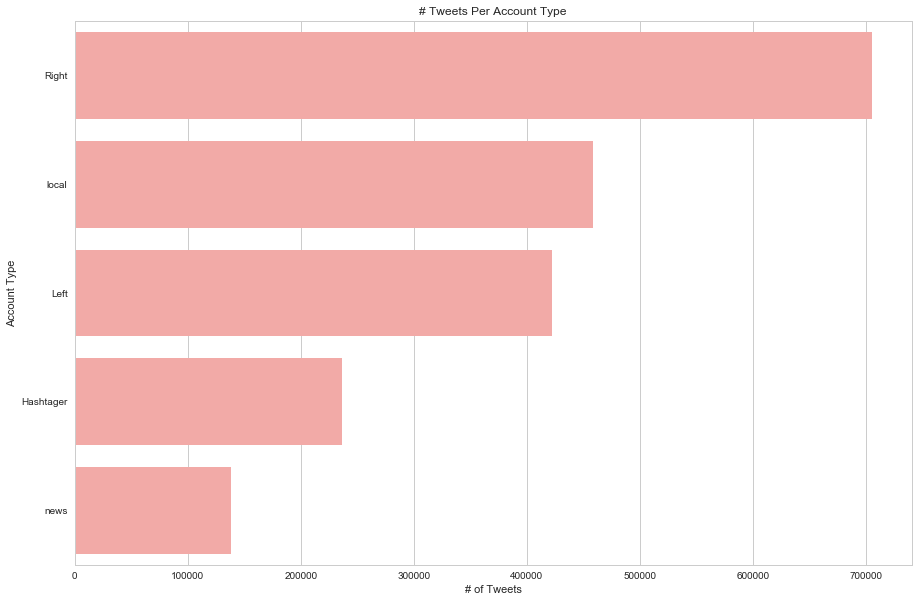

In [19]:
top_5_account_type = df['account_type'].value_counts()[:5].reset_index()

sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Plot the total tweets per account type
sns.set_color_codes("pastel")
sns.barplot(x="account_type", y='index', data=top_5_account_type,
            label="# Tweets", color="r")

# Add a legend and informative axis label
ax.set( ylabel="Account Type", title='# Tweets Per Account Type',
       xlabel="# of Tweets")

plt.show()

In [21]:
# separating publish date to : 1.date 2.time
df['date_tweet']=df['publish_date'].str.split().str[0]
df['time_tweet']=df['publish_date'].str.split().str[1]
count_by_id= df.groupby(['time_tweet', 'date_tweet','external_author_id']).size().reset_index(name='counts_tweet_per_id')

In [22]:
#Based on https://help.twitter.com/en/rules-and-policies/twitter-limits, each account can tweet 2400 tweets each day, which is 100 tweets each hour (being awake for 24 hours!). 100 tweets divided by 60 minutes tells us that each account can tweets 1.66 tweets in each minutes. Therefore, If an account on average tweets 2 or more than 2 tweets each minute, it is safe to say we deal with a automated contents which were uploaded very fast on twitter.(not sure)

In [23]:
count_by_id_more2= count_by_id[count_by_id>=2]

In [24]:
count_by_id_more2.describe()

,counts_tweet_per_id
count,306202.000000
mean,3.632654
std,2.790516
min,2.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,116.000000


In [25]:
count_by_id_more2[count_by_id_more2>=3].describe()

,counts_tweet_per_id
count,162855.000000
mean,5.069737
std,3.198394
min,3.000000
25%,3.000000
50%,4.000000
75%,6.000000
max,116.000000


In [26]:
df['count_freq_id_time']=df.groupby(['time_tweet','date_tweet',
                                     'external_author_id'])['external_author_id'].transform('count')

In [27]:
df[['external_author_id','count_freq_id_time', 'count']]  # count: is word-count

,external_author_id,count_freq_id_time,count
0,906000000000000000,1,156
1,906000000000000000,1,140
2,906000000000000000,1,143
3,906000000000000000,1,145
4,906000000000000000,1,83
5,906000000000000000,1,97
6,906000000000000000,1,27
7,906000000000000000,1,141
8,906000000000000000,1,140
9,906000000000000000,1,119


In [28]:
df['count_freq_id_time'].describe()

count    2.116867e+06
mean     3.509723e+00
std      4.592625e+00
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      1.160000e+02
Name: count_freq_id_time, dtype: float64

In [29]:
df_bot_maybe= df[df['count_freq_id_time']>1]

In [31]:
df_bot_maybe.shape

(1112326, 25)

In [87]:
# convert to lower case
df_bot_maybe['content_b'] = df_bot_maybe['content'].apply(lambda x: x.lower())

# removing stop words 

stop = stopwords.words('english')

df_bot_maybe['content_b'] = df_bot_maybe['content_b'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [88]:
df_bot_maybe['content_b'].head()

56                '@realdonaldtrump obamacare disaster!'
57     '@realdonaldtrump need end obamacare soon poss...
135                              https://t.co/2tvokfkddl
136                  '@sebgorka god bless first family!'
184    rioters st. louis burn american flag protest g...
Name: content_b, dtype: object

In [89]:

#remove punctuation

import string
from string import punctuation

df_bot_maybe['content_b'] = df_bot_maybe['content_b'].apply(lambda x:''.join([i for i in x if i not in string.punctuation]))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [90]:
df_bot_maybe['content_b'].head()

56                    realdonaldtrump obamacare disaster
57     realdonaldtrump need end obamacare soon possib...
135                                   httpstco2tvokfkddl
136                      sebgorka god bless first family
184    rioters st louis burn american flag protest gu...
Name: content_b, dtype: object

In [91]:
# removing the numbers from content
df_bot_maybe['content_b'] = df_bot_maybe['content_b'].apply(lambda x: 
                                                            ''.join([i for i in x if not i.isdigit()]))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [94]:
df_bot_maybe['content_b'] = df_bot_maybe['content_b'].str.replace('�','')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [95]:
df_bot_maybe['content_b'] = df_bot_maybe['content_b'].str.replace('��','')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [98]:
df_bot_maybe['content_b'] = df_bot_maybe['content_b'].str.replace('–','')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [99]:
import collections
c = collections.Counter(" ".join(df_bot_maybe['content_b']).split()).most_common(100)

In [100]:
print (c)

[('trump', 88567), ('rt', 82051), ('us', 34302), ('new', 34071), ('amp', 32170), ('people', 32020), ('get', 31430), ('like', 31297), ('news', 28394), ('breaking', 27310), ('obama', 26501), ('im', 26252), ('workout', 25679), ('one', 25545), ('video', 24728), ('via', 23527), ('hillary', 21224), ('black', 20729), ('time', 18957), ('white', 18848), ('president', 17883), ('know', 17132), ('…', 17131), ('make', 17033), ('need', 16841), ('love', 16815), ('good', 16679), ('go', 16407), ('want', 16285), ('day', 16146), ('would', 15656), ('america', 14676), ('look', 14643), ('realdonaldtrump', 14591), ('man', 14546), ('media', 14498), ('it', 14482), ('clinton', 14252), ('never', 14009), ('back', 13954), ('right', 13660), ('police', 13540), ('says', 13284), ('see', 13198), ('think', 12909), ('watch', 12897), ('maga', 12848), ('got', 12510), ('today', 12403), ('cnn', 12393), ('top', 12256), ('going', 12044), ('world', 11844), ('say', 11786), ('you', 11726), ('life', 11678), ('house', 11673), ('fir

#why do i still have? could, would, thats, would, could, me <br>
Based on these results, we can conclude that "Trump" and "RT" are the most repeated words!

In [161]:

# CountVectorizer - name & categories
cv = CountVectorizer()
X_name = cv.fit_transform(df_bot_maybe['content_b'])

In [164]:

from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(X_name)


In [165]:
print(tfidf.shape ) 

(1112326, 1321222)


In [166]:

from sklearn.cluster import KMeans

num_clusters = 5 
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf)
clusters = km.labels_.tolist()



KeyboardInterrupt: 

In [ ]:

idea={'X_n':df_bot_maybe['content_b'], 'Cluster':clusters} #Creating dict having doc with the corresponding cluster number.
frame=pd.DataFrame(idea,index=[clusters], columns=['X_n','Cluster']) # Converting it into a dataframe.

print("\n")
print(frame) #Print the doc with the labeled cluster number.
print("\n")
print(frame['Cluster'].value_counts()) #Print the counts of doc belonging to each cluster.
